In [1]:
library(tidyverse)
library(magrittr)
library(readxl)
library(naniar)
library(glue)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse




In [11]:
compare = function(first, second){
    # read both csvs using input strings
    firstcsv <- read_csv(glue("{first}.csv"), col_type = "cnn")
    secondcsv <- read_csv(glue("{second}.csv"), col_type = "cnn")
    
    #full join the two csvs on countryCode and year
    joined <- firstcsv %>% full_join(secondcsv, by=c("countryCode", "year"))
    
    # get the variable names (as strings)
    x = names(joined)[3]
    y = names(joined)[4]
    
    # ensym converts string to symbol, !! removes the quotes. This allows for variable column names
    plot <- joined %>% ggplot(aes(x = !!ensym(x), y = !!ensym(y)))
    plot + geom_jitter() + geom_smooth()
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 681 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 681 rows containing missing values (geom_point)."


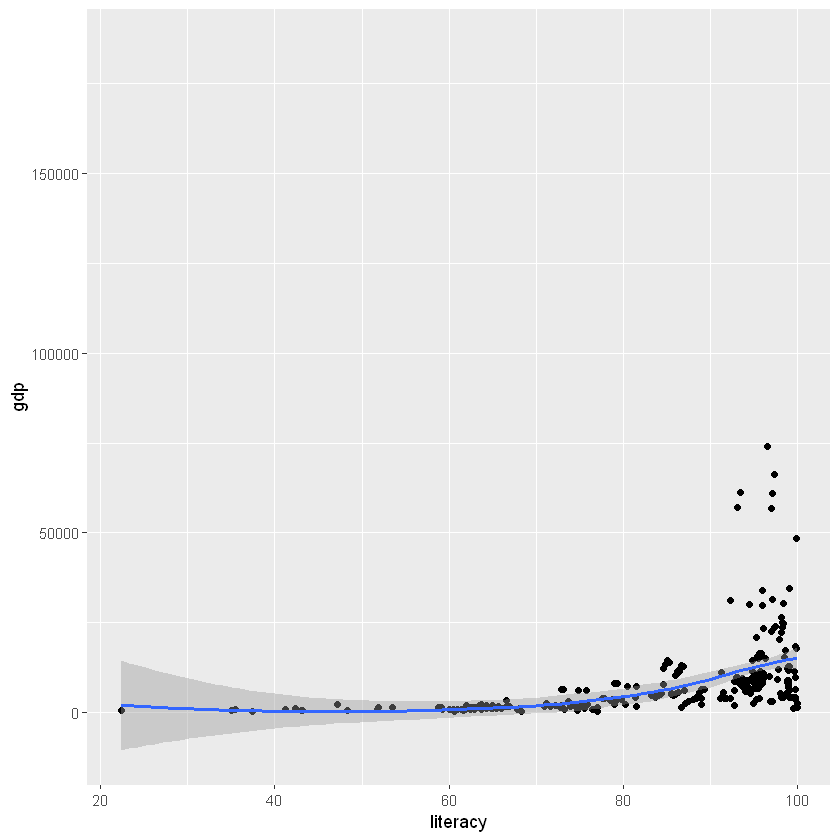

In [13]:
# this can then be done for any variable names chosen by a user in processIndicator
compare("literacy", "gdp")